In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from data_loader import load_data
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

## Loading data

In [2]:
load_data("shivachandel/kc-house-data", "../Data")
df = pl.read_csv("../Data/kc_house_data.csv", try_parse_dates=True)

Dataset URL: https://www.kaggle.com/datasets/shivachandel/kc-house-data


## Data exploration

In [3]:
df.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
i64,str,f64,i64,f64,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,i64,i64
7129300520,"""20141013T000000""",221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,"""20141209T000000""",538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
5631500400,"""20150225T000000""",180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,"""20141209T000000""",604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,"""20150218T000000""",510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

statistic,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",21613.0,"""21613""",21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21611.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",4.5803e9,null,540088.141767,3.370842,2.114757,2079.899736,15106.967566,1.494309,0.007542,0.234303,3.40943,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
"""std""",2.8766e9,null,367127.196483,0.930062,0.770163,918.440897,41420.511515,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.67924,53.505026,0.138564,0.140828,685.391304,27304.179631
"""min""",1.000102e6,"""20140502T000000""",75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,1.0,1.0,290.0,0.0,1900.0,0.0,98001.0,47.1559,-122.519,399.0,651.0
"""25%""",2.1230e9,null,321950.0,3.0,1.75,1427.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.471,-122.328,1490.0,5100.0
"""50%""",3.9049e9,null,450000.0,3.0,2.25,1910.0,7618.0,1.5,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,47.5718,-122.23,1840.0,7620.0
"""75%""",7.3089e9,null,645000.0,4.0,2.5,2550.0,10688.0,2.0,0.0,0.0,4.0,8.0,2210.0,560.0,1997.0,0.0,98118.0,47.678,-122.125,2360.0,10083.0
"""max""",9.9000e9,"""20150527T000000""",7.7e6,33.0,8.0,13540.0,1.651359e6,3.5,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,47.7776,-121.315,6210.0,871200.0


In [5]:
df = df.with_columns(pl.col("date").str.strptime(pl.Date, "%Y%m%dT%H%M%S"))
df = df.with_columns(pl.col("sqft_above").fill_null(strategy="mean"))

In [6]:
df.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
i64,date,f64,i64,f64,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,i64,i64
7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df = df.drop(["id"])
df.describe()

statistic,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""21613""",21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""","""2014-10-29 04:38:01.959000""",540088.141767,3.370842,2.114757,2079.899736,15106.967566,1.494309,0.007542,0.234303,3.40943,7.656873,1788.396058,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
"""std""",null,367127.196483,0.930062,0.770163,918.440897,41420.511515,0.539989,0.086517,0.766318,0.650743,1.175459,828.089843,442.575043,29.373411,401.67924,53.505026,0.138564,0.140828,685.391304,27304.179631
"""min""","""2014-05-02""",75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,1.0,1.0,290.0,0.0,1900.0,0.0,98001.0,47.1559,-122.519,399.0,651.0
"""25%""","""2014-07-22""",321950.0,3.0,1.75,1427.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.471,-122.328,1490.0,5100.0
"""50%""","""2014-10-16""",450000.0,3.0,2.25,1910.0,7618.0,1.5,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,47.5718,-122.23,1840.0,7620.0
"""75%""","""2015-02-17""",645000.0,4.0,2.5,2550.0,10688.0,2.0,0.0,0.0,4.0,8.0,2210.0,560.0,1997.0,0.0,98118.0,47.678,-122.125,2360.0,10083.0
"""max""","""2015-05-27""",7.7e6,33.0,8.0,13540.0,1.651359e6,3.5,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,47.7776,-121.315,6210.0,871200.0


In [8]:
df = df.with_columns(
    pl.col("date").dt.year().alias("year_sold")
)

In [9]:
df = df.with_columns(
    pl.when(pl.col("year_sold") - pl.col("yr_built") > 0)
    .then(pl.col("year_sold") - pl.col("yr_built"))
    .otherwise(0)
    .alias("age")
)

In [10]:
df.head()

date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,age
date,f64,i64,f64,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,i64,i64,i32,i64
2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,2014,63
2015-02-25,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82
2014-12-09,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28


<Axes: >

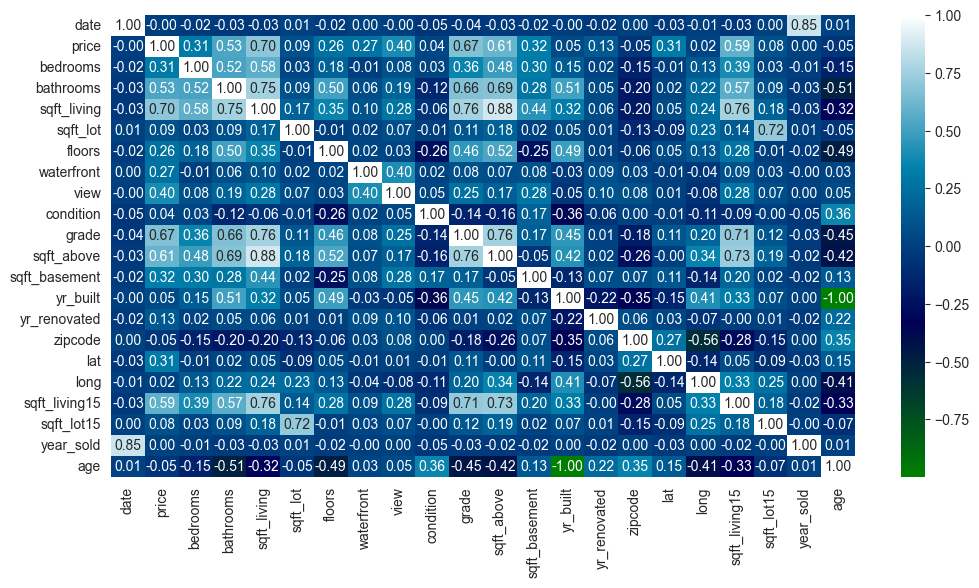

In [11]:
plt.figure(figsize=(12, 6))
correlation = df.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, cmap="ocean", annot=True,
            fmt=".2f")

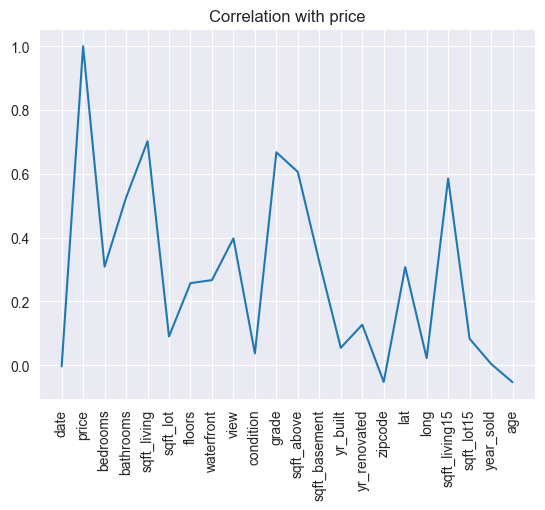

In [12]:
sns.lineplot(correlation["price"])
plt.xticks(ticks=range(len(correlation)), labels=correlation.columns, rotation=90)
plt.title("Correlation with price")
plt.show()

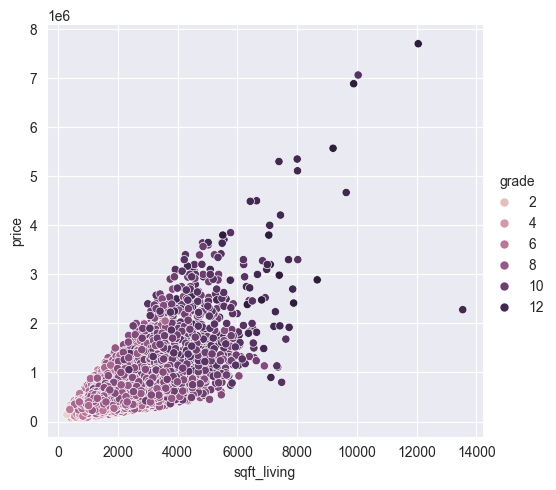

In [13]:
sns.relplot(df, x="sqft_living", y="price", hue="grade")

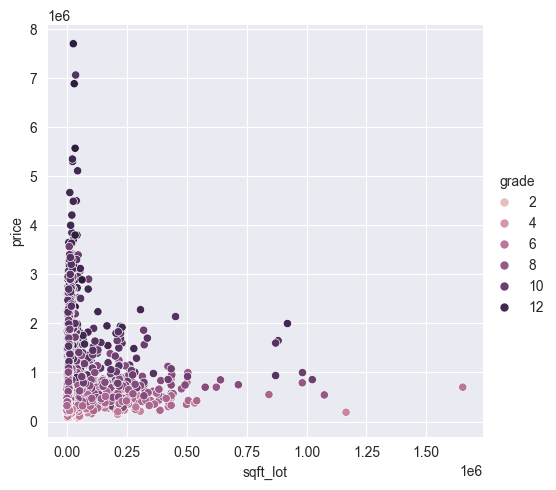

In [14]:
sns.relplot(df, x="sqft_lot", y="price", hue="grade")

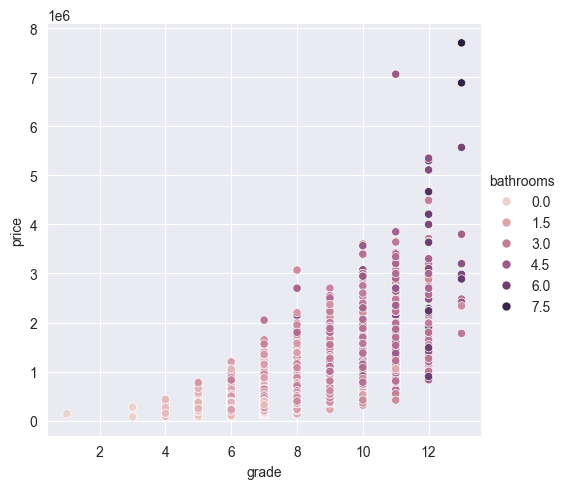

In [15]:
sns.relplot(df, x="grade", y="price", hue="bathrooms")

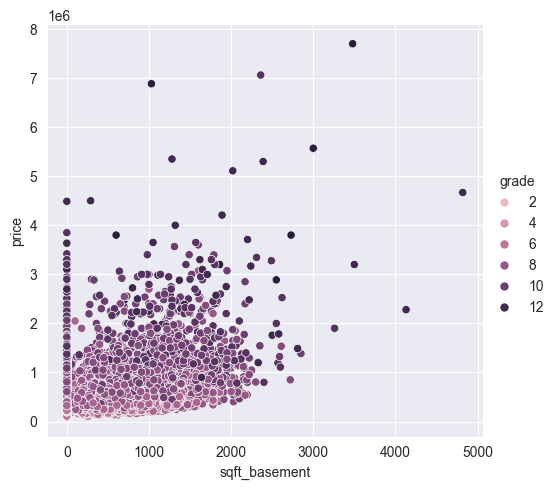

In [16]:
sns.relplot(df, x="sqft_basement", y="price", hue="grade")

In [17]:
# Find the row corresponding to 'price'
price_corr = correlation["price"]
mask = price_corr > 0.25
columns = [correlation.columns[i] for i, m in enumerate(mask) if m]
columns.remove("price")
columns

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'lat',
 'sqft_living15']

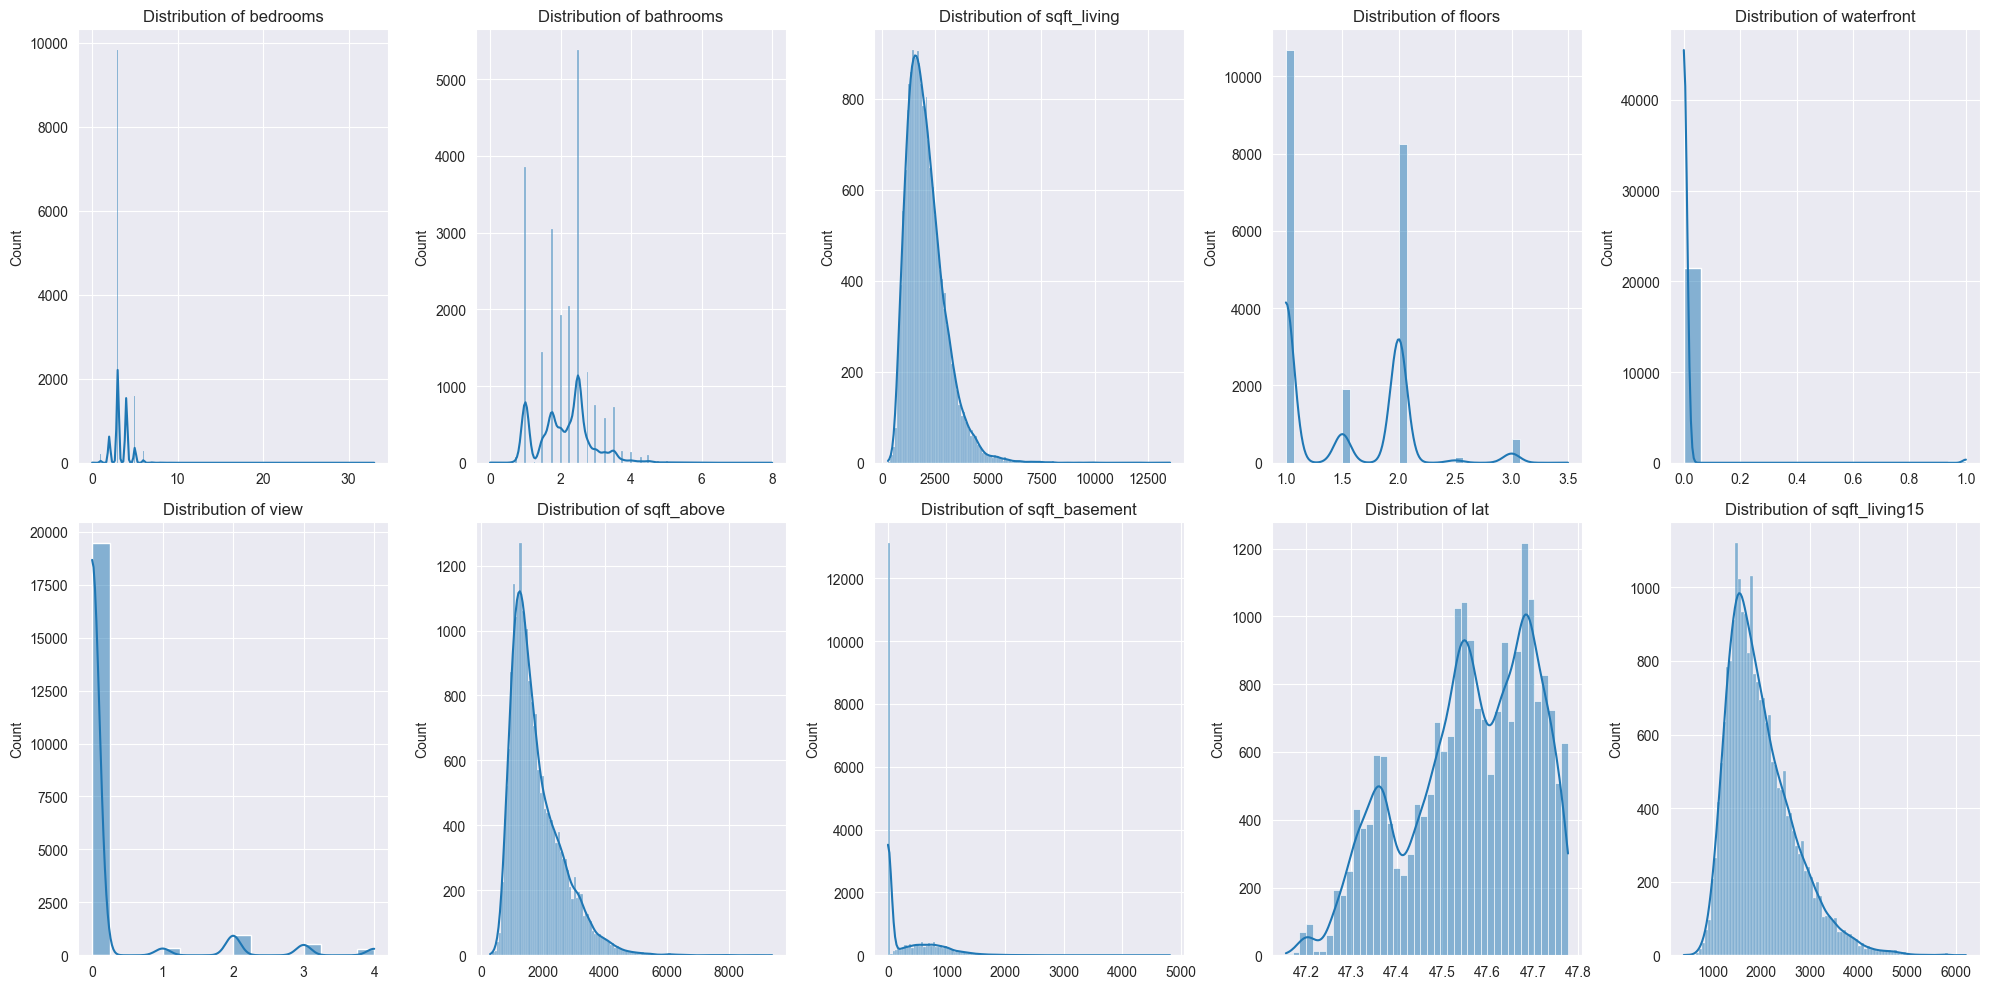

In [42]:
fig, axs = plt.subplots(2, len(columns)//2, figsize=(20, 10))
for i, column in enumerate(columns):
    row = 0 if i < len(columns)//2 else 1
    col = i % (len(columns)//2)
    sns.histplot(df[column], ax=axs[row,col], kde=True)
    axs[row,col].set_title(f"Distribution of {column}")
plt.tight_layout()

5

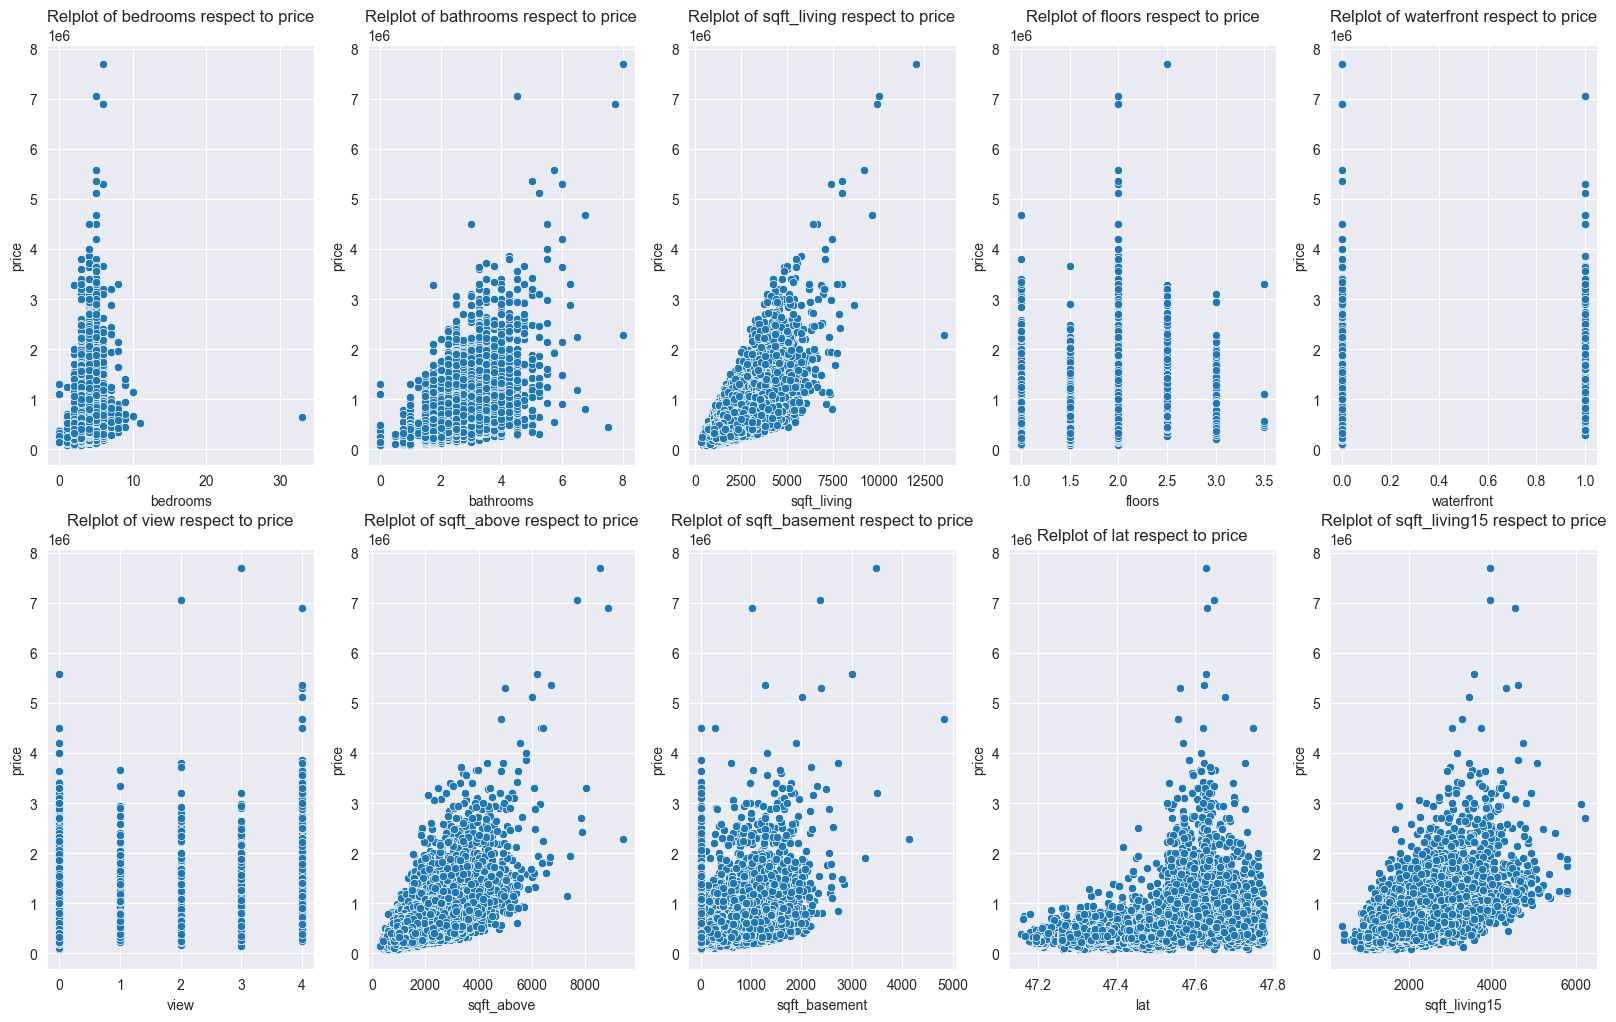

In [45]:
fig, axs = plt.subplots(2, len(columns)//2, figsize=(20, 12))
for i, column in enumerate(columns):
    row = 0 if i < len(columns)//2 else 1
    col = i % (len(columns)//2)
    sns.scatterplot(df, x=column, y="price", ax=axs[row,col])
    axs[row,col].set_title(f"Relplot of {column} respect to price")

In [20]:
columns.remove("grade")

## Prepare data

In [21]:
X = df[columns].to_numpy()
y = df["price"].to_numpy().reshape(-1, 1)

In [22]:
X.shape, y.shape

((21613, 10), (21613, 1))

## Split train and test data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Train the model

In [24]:
reg = LinearRegression()
model = reg.fit(X_train, y_train)

In [25]:
model.coef_, model.intercept_

(array([[-3.89330178e+04,  1.51759683e+04, -5.65097579e+01,
         -9.56705028e+03,  5.86765721e+05,  7.17559044e+04,
          3.03754740e+02,  2.76315794e+02,  7.33219950e+05,
          4.28451673e+01]]),
 array([-34830554.19180947]))

## Evaluate the model

In [26]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: {} MSE: {} RMSE: {} R^2 {}'.format(mae, mse, rmse, r2))

MAE: 138608.8043816149 MSE: 50846758871.307365 RMSE: 225492.25900528685 R^2 0.6249059332598513


## Visualize your result

Text(0, 0.5, 'y-actual')

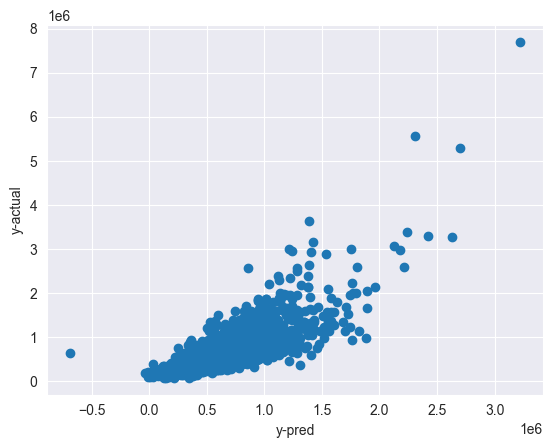

In [27]:
plt.scatter(y_pred, y_test)
plt.xlabel('y-pred')
plt.ylabel('y-actual')